# Missing Value Estimation

## Data Exploration

In [1]:
import pandas as pd
import numpy as np

# File paths for the missing data datasets
file_paths = {
    1: "../data/MissingData1.txt",
    2: "../data/MissingData2.txt",
    3: "../data/MissingData3.txt"
}

# Dictionary to store loaded datasets
missing_datasets = {}

# Load each dataset and replace missing values (1.00000000000000e+99) with NaN
for dataset_index, file_path in file_paths.items():
    print(f"Loading Dataset {dataset_index}...")
    
    # Load the dataset (assume tab-separated for .txt files)
    data = pd.read_csv(file_path, sep="\t", header=None)
    
    # Replace missing value placeholder with NaN
    data.replace(1.00000000000000e+99, np.nan, inplace=True)
    
    # Store the dataset in the dictionary
    missing_datasets[dataset_index] = data
    
    # Print basic information about the dataset
    total_values = data.size
    missing_values = data.isna().sum().sum()
    missing_percentage = (missing_values / total_values) * 100
    print(f"Dataset {dataset_index} loaded:")
    print(f" - Shape: {data.shape}")
    print(f" - Total Values: {total_values}")
    print(f" - Missing Values: {missing_values} ({missing_percentage:.2f}%)")
    print("-" * 40)

Loading Dataset 1...
Dataset 1 loaded:
 - Shape: (242, 14)
 - Total Values: 3388
 - Missing Values: 118 (3.48%)
----------------------------------------
Loading Dataset 2...
Dataset 2 loaded:
 - Shape: (758, 50)
 - Total Values: 37900
 - Missing Values: 3762 (9.93%)
----------------------------------------
Loading Dataset 3...
Dataset 3 loaded:
 - Shape: (273, 79)
 - Total Values: 21567
 - Missing Values: 17752 (82.31%)
----------------------------------------


## Data Visualization

Visualizing missing data for Dataset 1...


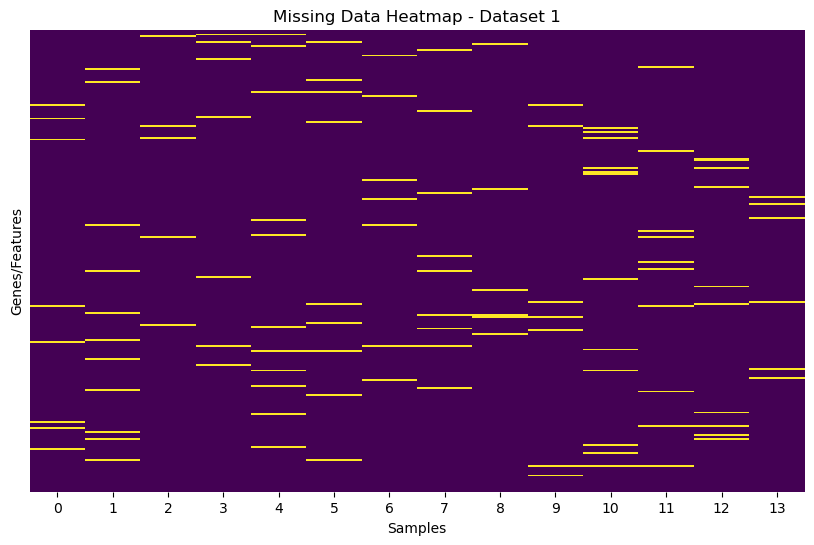

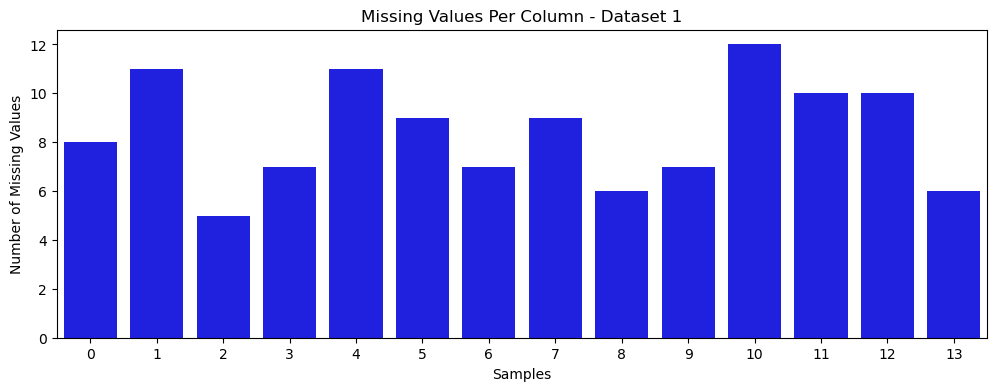

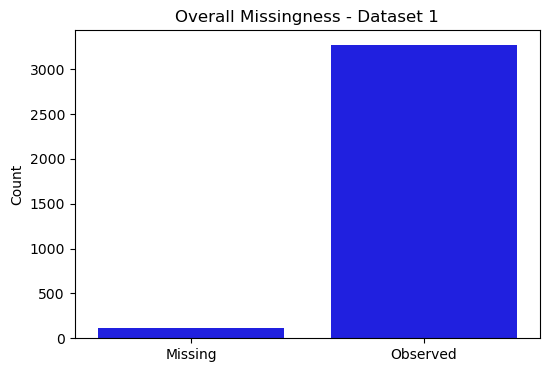

Visualizing missing data for Dataset 2...


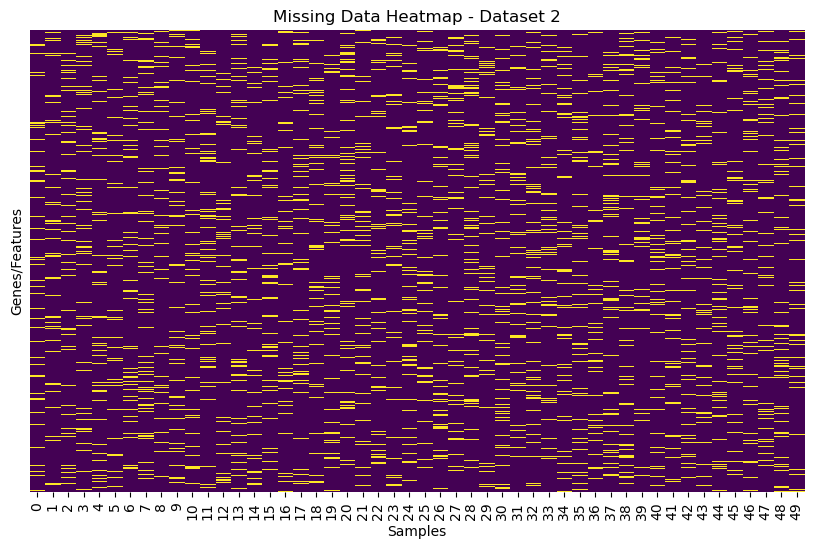

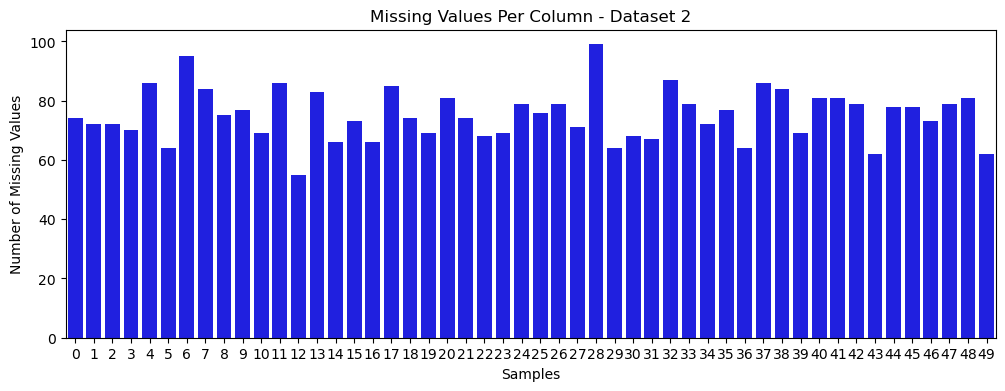

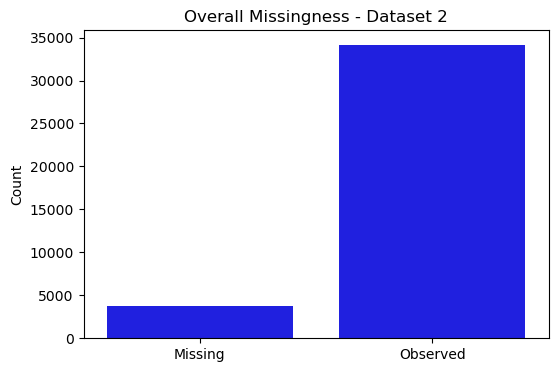

Visualizing missing data for Dataset 3...


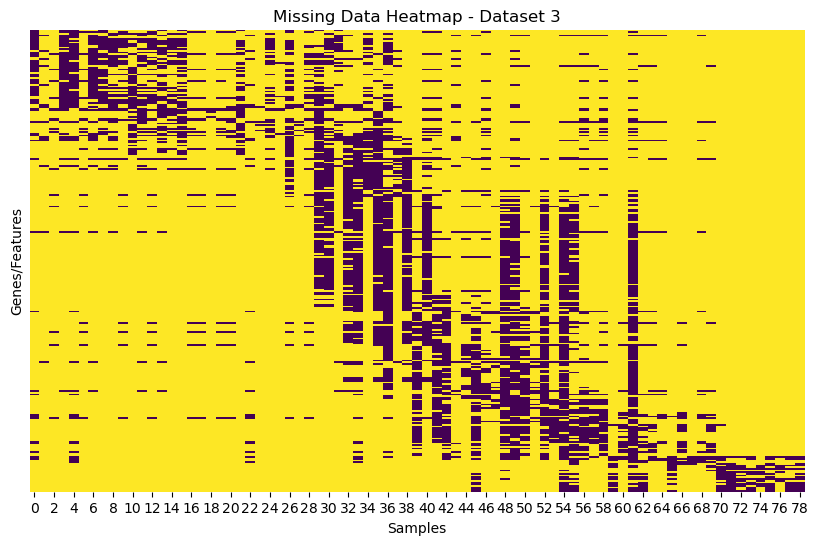

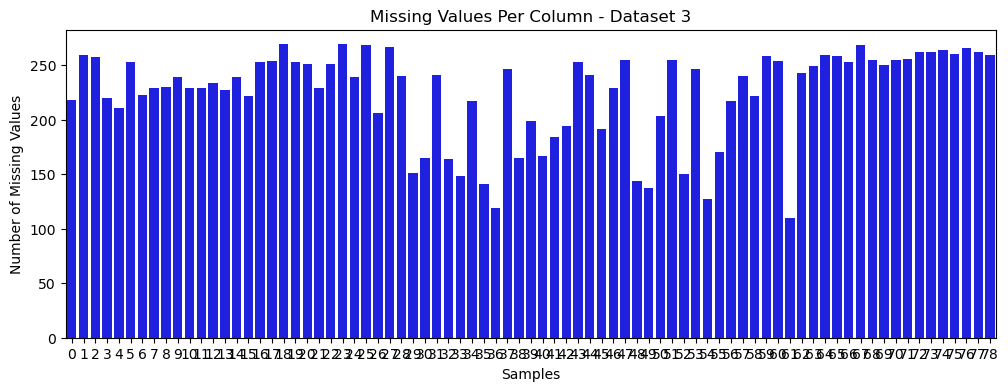

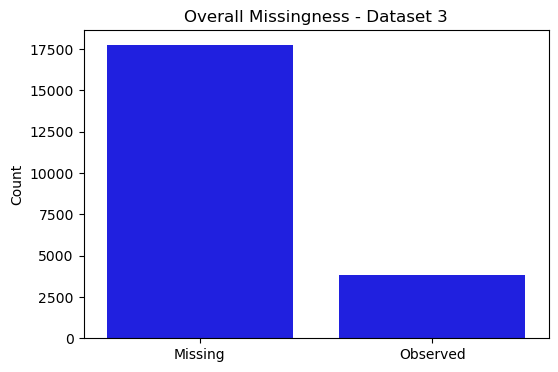

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of missing data for each dataset
for dataset_index, data in missing_datasets.items():
    print(f"Visualizing missing data for Dataset {dataset_index}...")
    
    # Set up the figure
    plt.figure(figsize=(10, 6))
    
    # Heatmap of missing values
    sns.heatmap(data.isna(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title(f"Missing Data Heatmap - Dataset {dataset_index}")
    plt.xlabel("Samples")
    plt.ylabel("Genes/Features")
    plt.show()

    # Bar plot showing the count of missing values per column
    missing_per_column = data.isna().sum()
    plt.figure(figsize=(12, 4))
    sns.barplot(x=missing_per_column.index, y=missing_per_column.values, color="blue")
    plt.title(f"Missing Values Per Column - Dataset {dataset_index}")
    plt.xlabel("Samples")
    plt.ylabel("Number of Missing Values")
    plt.show()

    # Overall summary plot of missing values
    plt.figure(figsize=(6, 4))
    total_missing = data.isna().sum().sum()
    sns.barplot(x=["Missing", "Observed"], y=[total_missing, data.size - total_missing], color="blue")  # Use color instead of palette
    plt.title(f"Overall Missingness - Dataset {dataset_index}")
    plt.ylabel("Count")
    plt.show()

## KNN Imputation

In [3]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Initialize dictionary to store imputed datasets
imputed_datasets = {}

# Imputation for all datasets using KNN
for dataset_index in [1, 2, 3]:
    print(f"Imputing Dataset {dataset_index} using KNN...")
    
    # Get the dataset
    data = missing_datasets[dataset_index]
    
    # Apply KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
    imputed_data = knn_imputer.fit_transform(data)
    
    # Save the imputed dataset back to the dictionary
    imputed_datasets[dataset_index] = pd.DataFrame(imputed_data, columns=data.columns)
    
    print(f"Dataset {dataset_index} imputation completed.")
    print("-" * 40)

# Save the imputed datasets to tab-separated .txt files
for dataset_index, imputed_data in imputed_datasets.items():
    output_path = f"../results/imputed_data_{dataset_index}.txt"
    imputed_data.to_csv(output_path, sep="\t", header=False, index=False)
    print(f"Imputed Dataset {dataset_index} saved to {output_path}")


Imputing Dataset 1 using KNN...
Dataset 1 imputation completed.
----------------------------------------
Imputing Dataset 2 using KNN...
Dataset 2 imputation completed.
----------------------------------------
Imputing Dataset 3 using KNN...
Dataset 3 imputation completed.
----------------------------------------
Imputed Dataset 1 saved to ../results/imputed_data_1.txt
Imputed Dataset 2 saved to ../results/imputed_data_2.txt
Imputed Dataset 3 saved to ../results/imputed_data_3.txt
